### KMeans Clustering
- As we discussed previously, the ML algorithms can be broadly classified into two categories: Supervised and Unsupervised
    - When we have a "target" and we need to obtain a function "f" with independent variables "X"s to predict target, the approach is called Supervised.
    - When we do not have a target, in such cases we try to understand the data by looking at the relations among the instances wrt the variables given (which instances are similar or what is relation between instance a and instance b etc). The other day we looked at one unsupervised algorithm "Association Rules" and today we will be learning another algorithm called kmeans
- Kmeans is a distance based iterative technique, where the instances that are "closer" are "grouped" together forming a "cluster". 
- This "closeness" is computed by distances,by default, Euclidean distances
- We need to specify prior, how many clusters we want to get.
- What is iterative in this case?
    - We specify a number of clusters we need, so in the first iteration, centroids(centre) of the cluster are randomly picked in the data (this centroid need not be a data point but could be any other point as well). For eg: if we need 3 clusters, 3 centroids are randomly picked.
    - Now with respect to each of these centroids, distance is computed for each of the points in the data and the data point is assigned to that cluster for which the point's distance is closest to its centroid. This is "Assignment phase".
    - Once all points are assigned to the clusters, new centroids are computed from the points of each cluster (in 2d it is (x1+x2)/2, (y1+y2)/2)..remember this formula :)
    - Once, this new centroids are computed, the assignment phase starts-- compute the distance between each of the data points with each of the new centroids and assign the point to the closest cluster. After assignment, the new cluster centroids are computed. This process continues until there is no change in cluster centroids from previous iteration
    

#### Loadin the required libraries

In [9]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import accuracy_score, recall_score,precision_score,confusion_matrix,mean_absolute_error,mean_squared_error
%matplotlib inline

#### We work with the diabetes data. Since it has a target, we drop the target and consider only the independent attributes for the clustering activity

In [10]:

lables = ["Number of times pregnant",
"Plasma glucose concentration",
"Diastolic blood pressure (mm Hg)",
"Triceps skin fold thickness (mm)",
"2-Hour serum insulin (mu U/ml)",
"Body Mass Index",
"Diabetes pedigree function",
"Age (years)",
"Target"]
diabetics = pd.read_csv("Diabetes_Data.csv",names=lables)
diabetics.head()
diabetics.columns
diabetics['Target'] = diabetics['Target'].astype("category")
diabetics['Target'].value_counts()

0    500
1    268
Name: Target, dtype: int64

In [11]:
diabetics.head(5)

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body Mass Index,Diabetes pedigree function,Age (years),Target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
numeric_vars = diabetics.drop(['Target'],axis=1)

In [13]:
numeric_vars.head(5)

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body Mass Index,Diabetes pedigree function,Age (years)
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [14]:
# Divide  data in to train and test
  
X_train, X_test= train_test_split(numeric_vars, test_size=0.150) 

In [15]:
print(X_train.shape)
print(X_test.shape)

(652, 8)
(116, 8)


#### As mentioned during the preprocessing session, for any distance based algo, we need to standardize the data to bring all attributes to the same scale

In [16]:
std = StandardScaler()
std.fit(X_train)
X_train_std= std.transform(X_train)
X_test_std= std.transform(X_test)

/home/kumar/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/kumar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/kumar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [17]:
X_train_std[0:5,:]

array([[ 0.35151095, -0.52821487,  0.25425793, -1.2896985 , -0.70033897,
        -0.39892171, -0.95833222,  1.21548526],
       [ 0.94525484,  0.89670152, -0.15481344,  1.3518201 ,  2.26636604,
         0.35616958,  0.71176624,  0.71627494],
       [ 0.35151095, -1.02383797, -0.15481344,  0.0310608 , -0.50082372,
        -0.96204064, -0.39966212, -0.28214571],
       [ 1.53899872,  0.7418193 ,  0.56106146,  1.6033933 ,  0.42735592,
         0.76571062,  0.4723362 ,  0.54987149],
       [ 0.35151095, -1.36457884,  0.6633293 ,  1.2889268 , -0.33600678,
         0.49694931, -0.94946444,  0.13386289]])

In [18]:
X_train.index

Int64Index([636,  54,  52, 663, 302, 457, 621, 363, 267, 714,
            ...
            482, 285, 172,  24, 269, 375, 137,  91, 206, 214],
           dtype='int64', length=652)

In [19]:
# Number of clusters
kmeans = KMeans(n_clusters=2,random_state=148461)
# Fitting the input data
kmeans = kmeans.fit(X_train_std)
# Getting the cluster labels
labels = kmeans.predict(X_train_std)
# Centroid values
centroids = kmeans.cluster_centers_

In [20]:
#To get the centroids of the clusters. Remember that the centroids need not be the actual points in the cluster
centroids

array([[-0.51605365, -0.24541817, -0.21918202,  0.11925941,  0.04969549,
        -0.05939412, -0.00130755, -0.57501577],
       [ 0.96617973,  0.45948335,  0.41036281, -0.22328303, -0.09304222,
         0.11120044,  0.00244806,  1.07657137]])

In [21]:
labels

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,

In [22]:
# Getting the cluster labels for the test Data set
labels_test = kmeans.predict(X_test_std)


In [23]:
labels_test

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1], dtype=int32)

In [24]:
print(kmeans.cluster_centers_)
print(kmeans.inertia_) #Total sum of squares for distance between each point and their corresponding cluster centroid

[[-0.51605365 -0.24541817 -0.21918202  0.11925941  0.04969549 -0.05939412
  -0.00130755 -0.57501577]
 [ 0.96617973  0.45948335  0.41036281 -0.22328303 -0.09304222  0.11120044
   0.00244806  1.07657137]]
4330.4431461453205


#### In the above case, we have randomly selected two clusters. But how would we know if two clusters is ideal... 
- THe clustering is said to be good, if the points in the cluster are closer to each other and the clusters themselves are far apart. The two quantities which describe the above said factors are "Within Sum of Squares (wss)" and "Between Sum of Squares(bss)" respectively. In kmeans python, wss is defined ad inertia. 
- Ideally, if wss is minimum, we have a better clustering. 
- Now the question is.. how do we choose k 

In [25]:
wss= {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X_train_std)
    clusters = kmeans.labels_
    wss[k] = kmeans.inertia_ # Inertia: Sum of squared distances of samples to their closest cluster center
    

In [26]:
wss

{1: 5216.0,
 2: 4328.555769826547,
 3: 3690.324354354399,
 4: 3308.886377122934,
 5: 3051.419008070613,
 6: 2828.6720254050524,
 7: 2644.30896281573,
 8: 2530.826425734609,
 9: 2418.743461081307}

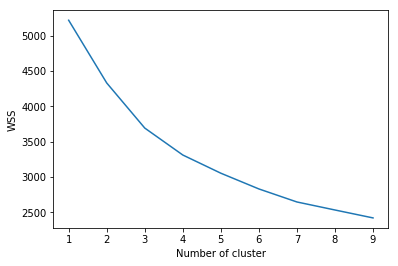

In [27]:
plt.figure()
plt.plot(list(wss.keys()), list(wss.values()))
plt.xlabel("Number of cluster")
plt.ylabel("WSS")
plt.show()

#### Checking for cluster stability

In [28]:
from sklearn.metrics import adjusted_rand_score
import numpy as np

In [29]:
X_train_std=pd.DataFrame(X_train_std)

In [30]:
X_train_std.shape

(652, 8)

In [31]:
indices=X_train_std.sample(frac=0.9,random_state=1234).index
print(indices)

Int64Index([366, 266, 156, 572, 187, 327, 378, 146, 494, 240,
            ...
            346, 354, 256, 340, 183, 574, 434, 334, 235, 311],
           dtype='int64', length=587)


In [32]:
Alpha=X_train_std.iloc[indices,:]

In [33]:
Alpha.shape

(587, 8)

In [34]:
kmeans = KMeans(n_clusters=2)
kmeans1 = kmeans.fit(X_train_std)
print(len(kmeans1.labels_))
X_train_std['clus']=kmeans1.labels_

652


In [35]:
kmeans = KMeans(n_clusters=2)
kmeans2=kmeans.fit(Alpha)
print(len(kmeans2.labels_))
Alpha['clus']=kmeans2.labels_

587


/home/kumar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [36]:
Alpha.shape

(587, 9)

In [37]:
g1=X_train_std.loc[indices,'clus']
g2=Alpha.clus

In [38]:
adjusted_rand_score(g1,g2)

0.44214273749042504